# Prosper Loan Dataset Analysis - Part 2

## Charactaristics of ideal borrowers

### Overview <br>
The Prosper loan dataset contains information on over 100000 borrowers from Prosper, a peer-to-peer lending company that facilitates the borrower and lender relationsip.  The goal of the analysis is to find out what variables make a good borrower and looking for relationships between the variables included in the dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Read dataset
loans_df_original = pd.read_csv('prosperloanData.csv')

In [3]:
#Copy dataframe
loans_df = loans_df_original.copy(deep=True)

In [4]:
#Truncate dataframe
columns = ['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ProsperScore', 'ListingCategory (numeric)', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate']
loans_trunc = loans_df[columns]

In [5]:
#Change dates to datetime datatype
loans_trunc['ListingCreationDate'] = pd.to_datetime(loans_trunc['ListingCreationDate'])
loans_trunc['LoanOriginationDate'] = pd.to_datetime(loans_trunc['LoanOriginationDate'])

In [6]:
#Change credit grade and loan status to ordinal categorical data.
CreditGrade_ord = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
LoanStatus_ord = ['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted', 'Chargedoff', 'Cancelled']
CreditGrade_cats = pd.api.types.CategoricalDtype(ordered = True, categories = CreditGrade_ord)
LoanStatus_cats = pd.api.types.CategoricalDtype(ordered = True, categories = LoanStatus_ord)
loans_trunc['CreditGrade'] = loans_trunc['CreditGrade'].astype(CreditGrade_cats)
loans_trunc['LoanStatus'] = loans_trunc['LoanStatus'].astype(LoanStatus_cats)

## Distribution of Loan Status<br>
It can be seen that the majority of loans are in good standing (completed, final payment in progress, or current).  All other categories are a loss of revenue for the company if the borrower does not continue paying on the loan.

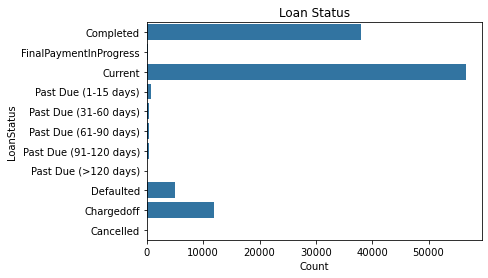

In [7]:
base_color = sb.color_palette()[0]
ax = sb.countplot(data=loans_trunc, y='LoanStatus', color=base_color);
ax.set_title('Loan Status');
ax.set_xlabel('Count');

## Distribution of homeownership<br>
Home ownership is roughly split evenly with slightly more homeowners than non-homeowners.

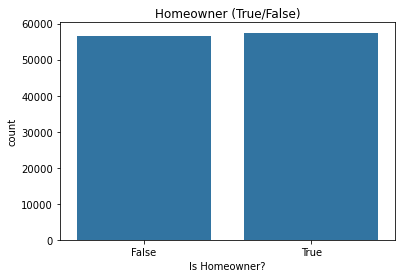

In [8]:
base_color = sb.color_palette()[0]
ax = sb.countplot(data=loans_trunc, x='IsBorrowerHomeowner', color=base_color);
ax.set_title('Homeowner (True/False)');
ax.set_xlabel('Is Homeowner?');

## Distribution of monthly income<br>
As usual monthly income is positively skewed so note the log scale on the x-axis.  The median monthly income is around 5k, but can vary to over 1 million.

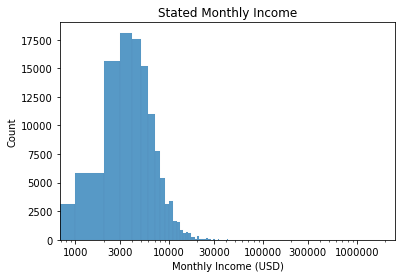

In [9]:
base_color = sb.color_palette()[0]
bins = np.arange(loans_trunc['StatedMonthlyIncome'].min(), loans_trunc['StatedMonthlyIncome'].max(), 1000);
ax = sb.histplot(data=loans_trunc, x='StatedMonthlyIncome', color=base_color, bins=bins);
ax.set_xscale('log');
ax.set_xlabel('Monthly Income (USD)');
ax.set_xticks([1000, 3000, 10000, 30000, 100000, 300000, 1000000]);
ax.set_xticklabels([1000, 3000, 10000, 30000, 100000, 300000, 1000000]);
ax.set_title('Stated Monthly Income');

## Stated Monthly Income vs Loan Status<br>
Having a higher monthly income means one is more likely to be in good standing.  Note the log scale on the y-axis.

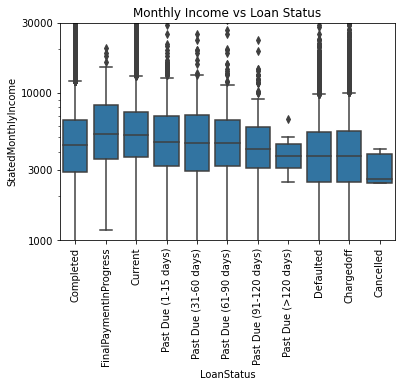

In [21]:
default_color = sb.color_palette()[0]
ax = sb.boxplot(data=loans_trunc, x='LoanStatus', y='StatedMonthlyIncome', color=default_color);
ax.set_yscale('log')
ax.set_yticks([1000, 3000, 10000, 30000, 100000, 300000, 1000000])
ax.set_yticklabels([1000, 3000, 10000, 30000, 100000, 300000, 1000000]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
ax.set_ylim([1000,30000]);
plt.title('Monthly Income vs Loan Status');

## Homeownership vs Loan Status<br>
These proportions are normalized by the number of homeowners vs non-homeowners.  Default, chargedoff or cancelled loans are more common with non-homeowners.

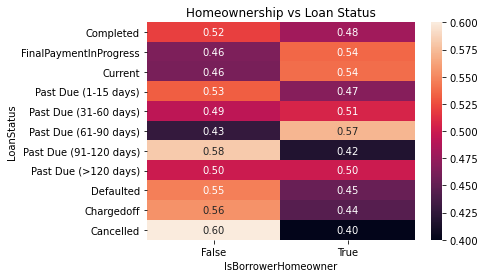

In [19]:
table = loans_trunc.groupby('LoanStatus')['IsBorrowerHomeowner'].value_counts(normalize=True).unstack('IsBorrowerHomeowner')
sb.heatmap(table, annot=True, fmt='.2f');
plt.title('Homeownership vs Loan Status');

## Looking at 3 variables, Homeownership, Monthly Income, and Loan Status<br>
One can see that the homeowner status of the borrower does not affect the relationship between income and loan status.

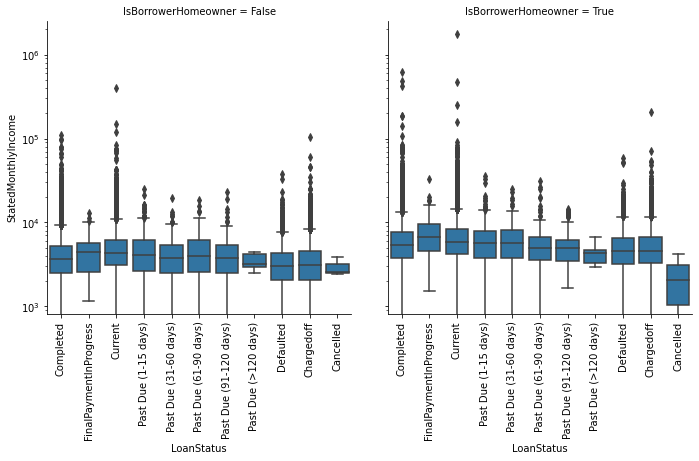

In [17]:
g = sb.FacetGrid(data = loans_trunc, col = 'IsBorrowerHomeowner', size = 5);
g.map(sb.boxplot, 'LoanStatus', 'StatedMonthlyIncome').set(yscale ='log').set_xticklabels(rotation=90);